In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Business Analyst Workflow with Vertex AI Extensions

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/applied-ai-engineering-samples/blob/main/genai-on-vertex-ai/vertex_ai_extensions/notebooks/business_analyst_workflow_vertexai_extensions.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_ai_extensions%2Fnotebooks%2Fbusiness_analyst_workflow_vertexai_extensions.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/applied-ai-engineering-samples/main/genai-on-vertex-ai/vertex_ai_extensions/notebooks/business_analyst_workflow_vertexai_extensions.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/applied-ai-engineering-samples/tree/main/genai-on-vertex-ai/vertex_ai_extensions/notebooks/business_analyst_workflow_vertexai_extensions.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

| | |
|----------|-------------|
| Author(s)   | [Lei Pan](https://github.com/genaimagician)|
| Reviewers(s) | [Meltem Subasioglu](https://github.com/5Y5TEM), Michael W. Sherman|
| Last updated | 2024-04-30: Code Review and Cleanup |
| | 2024-04-24: Code & Documentation Changes |

## Overview

In this notebook, we will show you how to use the Vertex AI Extensions Code Interpreter and Vertex AI Search extensions to complete a housing investment opportunities research report for business stakeholders. You will perform the following steps:

- Creating a pre-built Code Interpreter extension in your project
- Using Code Interpreter to analyze housing data
- Creating and using the Vertex AI Search extension to research on housing investment opportunities
- (Optional) Automatically adding the data analysis and research to your Google Slide deck with the [Google Sheets API](https://developers.google.com/sheets/api/guides/concepts) and [Google Slides API](https://developers.google.com/slides/api/reference/rest)
- (Optional) Emailing the Slides deck link to stakeholders with the [Gmail API](https://developers.google.com/gmail/api/guides)

▶ If you're already familiar with Google Cloud and the Vertex AI Extensions Code Interpreter and Vertex AI Search Extensions, you can skip reading between here and the "**Getting Started**" section.

### Vertex AI Extensions

[Vertex AI Extensions](https://cloud.google.com/vertex-ai/generative-ai/docs/extensions/overview) is a platform for creating and managing extensions that connect large language models to external systems via APIs. These external systems can provide LLMs with real-time data and perform data processing actions on their behalf. You can use pre-built or third-party extensions in Vertex AI Extensions.

### Vertex AI Extensions Code Interpreter Extension

The [Code Interpreter](https://console.cloud.google.com/vertex-ai/generative-ai/docs/extensions/google-extensions.md#google_code_interpreter_extension) extension provides access to a Python interpreter with a sandboxed, secure execution environment. It lets you generate and execute Python code to:

* Analyze, clean, transform, and reshape your datasets
* Visualize data in charts and graphs
* Execute calculations

### Vertex AI Extensions Search Extension

The Vertex AI [Search](https://cloud.google.com/vertex-ai/generative-ai/docs/extensions/google-extensions#vertex_ai_search_extension) extension lets you access and search website corpuses and unstructured data to provide relevant responses to natural language questions, such as:

* "How did the competitive threats for the company change from Q1 of last year to Q1 of this year?"
* "What parts of the company are growing the fastest? How fast?"

### Using this Notebook

If you're running outside of Colab, depending on your environment you may need to install pip packages that are included in the Colab environment by default but are not part of the Python Standard Library. Outside of Colab you'll also notice comments in code cells that look like #@something, these trigger special Colab functionality but don't change the behavior of the notebook.

This tutorial uses the following Google Cloud services and resources:

* Vertex AI Extensions
* Google Cloud Storage Client
  - If you don't have a bucket, you can follow [this doc](https://cloud.google.com/storage/docs/creating-buckets) to create one or follow the code provided in this notebook later.
* Google Slides API (needed only if you run the optional step 4 and 5)
* Google Sheets API (needed only if you run the optional step 4 and 5)
* Gmail API (needed only if you run the optional step 4 and 5)

This notebook has been tested in the following environment:

* Python version = 3.10.12
* [google-cloud-aiplatform](https://pypi.org/project/google-cloud-aiplatform/) version = 1.4.7
* [google-cloud-discoveryengine](https://cloud.google.com/python/docs/reference/discoveryengine/latest) version = 0.11.11

**Note:** Vertex AI Extensions requires google-cloud-aiplatform version >= 1.47.0

🗒 **Please note: the optional section near the end of this notebook shows how to use Google's Workspace APIs to save a PDF report to your Google Drive and to send an email with the attached PDF. Using the Workspace APIs requires going through a web-based authentication flow. Many remote notebook environments, including Colab and Juypterlab, don't support this out-of-the-box. If you want to run through the optional section, make sure you are running this notebook in an environment that can open a webpage that you can interact with, like a local development environment.**

### Useful Tips

1. This notebook uses Generative AI cababilities. Re-running a cell that uses Generative AI capabilities may produce similar but not identical results.
2. Because of #1, it is possible that an output from Code Interpreter producess errors. If that happens re-run the cell that produced the coding error. The different generated code will likely be bug free. The `run_code_interpreter` method below helps automate this, but you still may need to rerun cells that generate working code that doesn't perfectly follow the instructions in the prompt.
3. The use of Extensions and other Generative AI capabilities is subject to service quotas. Running the notebook using "Run All" may exceed  your queries per minute (QPM) limitations. Run the notebook manually and if you get a quota error pause for up to 1 minute before retrying that cell. Code Interpreter defaults to Gemini on the backend and is subject to the Gemini quotas, [view your Gemini quotas here](https://console.cloud.google.com/iam-admin/quotas?pageState=(%22allQuotasTable%22:(%22f%22:%22%255B%257B_22k_22_3A_22_22_2C_22t_22_3A10_2C_22v_22_3A_22_5C_22base_model_5C_22_22%257D_2C%257B_22k_22_3A_22_22_2C_22t_22_3A10_2C_22v_22_3A_22_5C_22gemini_5C_22_22%257D%255D%22%29%29&e=13802955&mods=logs_tg_staging).
4. The Code Interpreter Extension is stateless and therefore every request to Code Interpreter does not have knowledge of previous operations nor files injested or produced in previous steps. Therefore, with any request to Code Interpreter you need to submit all files and instructions for that request to complete successfully.



## Getting Started

The following steps are necessary to run this notebook, no matter what notebook environment you're using.

If you're entirely new to Google Cloud, [get started here](https://cloud.google.com/docs/get-started).

### Google Cloud Project Setup

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs.
1. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project).
1. [Enable the Service Usage API](https://console.cloud.google.com/apis/library/serviceusage.googleapis.com)
1. [Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).
1. [Enable the Cloud Storage API](https://console.cloud.google.com/flows/enableapi?apiid=storage.googleapis.com).
1. [Enable the Discovery Engine API for your project](https://console.cloud.google.com/marketplace/product/google/discoveryengine.googleapis.com).
1. [Enable the Agent Builder API](https://console.cloud.google.com/gen-app-builder/start).
1. [Enable the Slide API](https://console.cloud.google.com/flows/enableapi?apiid=slides.googleapis.com) (needed only if you run the optional step 4 and 5).
1. [Enable the Sheet API](https://console.cloud.google.com/flows/enableapi?apiid=sheets.googleapis.com) (needed only if you run the optional step 4 and 5).
1. [Enable the Gmail API](https://console.cloud.google.com/flows/enableapi?apiid=gmail.googleapis.com). (needed only if you run the optional step 4 and 5).

In [48]:
vertexai.__version__

'1.49.0'

### Google Cloud Permissions

**To run the complete Notebook, including the optional section, you will need to have the [Owner role](https://cloud.google.com/iam/docs/understanding-roles) for your project.**

If you want to skip the optional section, you need at least the following [roles](https://cloud.google.com/iam/docs/granting-changing-revoking-access):
* **`roles/serviceusage.serviceUsageAdmin`** to enable APIs
* **`roles/iam.serviceAccountAdmin`** to modify service agent permissions
* **`roles/discoveryengine.admin`** to modify discoveryengine assets
* **`roles/aiplatform.user`** to use AI Platform components
* **`roles/storage.objectAdmin`** to modify and delete GCS buckets





### Install Vertex AI SDK and Other Required Packages


In [ ]:
!pip install google-cloud-discoveryengine --upgrade
!pip install google-cloud-aiplatform --upgrade
# Note -- this may not work in some non-Colab environments. If you get errors
# when running 'import vertexai' below, you'll need to find another way to
# install the latest google-cloud-aiplatform package into your notebook kernel.
# In some kernel setups running "%pip install google-cloud-aiplatform --upgrade"
# in a code cell works if "!pip install ...." doesn't.

## If you're running outside of colab, make sure to install the following modules as well:
!pip install google
!pip install google-api-python-client
!pip install google-oauth
!pip install google-auth-oauthlib
!pip install Pillow

### Restart Runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

You may see the restart reported as a crash, but it is working as-intended -- you are merely restarting the runtime.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [2]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Please wait until it is finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate

If you're using Colab, run the code in the next cell. Follow the popups and authenticate with an account that has access to your Google Cloud [project](https://cloud.google.com/resource-manager/docs/creating-managing-projects#identifying_projects).

If you're running this notebook somewhere besides Colab, make sure your environment has the right Google Cloud access. If that's a new concept to you, consider looking into [Application Default Credentials for your local environment](https://cloud.google.com/docs/authentication/provide-credentials-adc#local-dev) and [initializing the Google Cloud CLI](https://cloud.google.com/docs/authentication/gcloud). In many cases, running `gcloud auth application-default login` in a shell on the machine running the notebook kernel is sufficient.

More authentication options are discussed [here](https://cloud.google.com/docs/authentication).

In [ ]:
# Colab authentication.
import sys

if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user()
    print('Authenticated')

Authenticated


### Set Google Cloud project information and initialize Vertex AI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

Make sure to change `PROJECT_ID` in the next cell. You can leave the values for `REGION` and `API_ENV` unless you have a specific reason to change them.

In [47]:
import vertexai

PROJECT_ID = "your project id"  # @param {type:"string"}
REGION = "us-central1"  # @param {type: "string"}
API_ENV = "aiplatform.googleapis.com"  # @param {type:"string"}

vertexai.init(
    project=PROJECT_ID,
    location=REGION,
    api_endpoint=f"{REGION}-{API_ENV}",
)

## Using Vertex AI Extensions to Complete a Housing Research Report for Business Stakeholders Tutorial

### Import Libraries

### Step 1: Create a Code Interpreter Extension

Now you can create the extension. The following cell uses the Python SDK to import the extension (thereby creating it) into Vertex AI Extensions.

In [4]:
from vertexai.preview import extensions
extension_code_interpreter = extensions.Extension.from_hub("code_interpreter")
extension_code_interpreter

Creating Extension
Create Extension backing LRO: projects/812852329854/locations/us-central1/extensions/5230121726632787968/operations/293025930475995136
Extension created. Resource name: projects/812852329854/locations/us-central1/extensions/5230121726632787968
To use this Extension in another session:
extension = vertexai.preview.extensions.Extension('projects/812852329854/locations/us-central1/extensions/5230121726632787968')


resource name: projects/812852329854/locations/us-central1/extensions/5230121726632787968

### Step 2: Use Code Interpreter to Analyze Housing Data

In this example, you'll send Code Interpreter a prompt with instructions to use data from a CSV file that you'll include with the Code Interpreter call.

- Step 1: Download the housing data CSV and convert it to base64.
- Step 2: Call the Code Interpreter extension to generate a histogram of median housing values and save the binned histogram data as a csv file from the attached file.
- Step 3: Use a helper function to print out the histogram and output file name.

####  Download the Housing Sample Data File

The dataset contains housing statistics for each [block group](https://en.wikipedia.org/wiki/Census_block_group) in California from the 1990 Census. Each block group averages 1425.5 individuals. Computed distances among the centroids of each block group are in the latitude and longitude fields. Block groups with 0 entries were removed, resulting in 20,640 observations.

[Here is the reference and citation of the dataset](https://developers.google.com/machine-learning/crash-course/california-housing-data-description)

We use this dataset to calculate median housing values of each block group.

In [5]:
# Download the sample data file and encode it in base64.
import base64
!curl -O https://storage.googleapis.com/cloud-samples-data/vertex-ai/extensions/code-interpreter/california-housing-test.csv
filename = "california-housing-test.csv"
with open(filename, "rb") as file:
    encoded_string = base64.b64encode(file.read()).decode()

curl: /opt/conda/lib/libcurl.so.4: no version information available (required by curl)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  294k  100  294k    0     0  1926k      0 --:--:-- --:--:-- --:--:-- 1934k


#### Call the Code Interpreter Extension to Generate a Histogram and CSV File

The output from calling the Code Interpreter extension includes the generated Python code, the histogram, and the generated data file. We print out the raw output using pprint.

In [6]:
import pprint
CODE_QUERY = """From the attached CSV file, generate a histogram of median house
values. And save median house values and their counts in a file."""

response = extension_code_interpreter.execute(
    operation_id = "generate_and_execute",
    operation_params = {"query": CODE_QUERY,
        "files": [{"name": filename, "contents": encoded_string}],},)

print("Generated Code:")
pprint.pprint({response['generated_code']})

print("Generated File Names:")
for file_name in response['output_files']:
    pprint.pprint(file_name['name'])

Generated Code:
{'```python\n'
 'import pandas as pd\n'
 'import matplotlib.pyplot as plt\n'
 '\n'
 '# Read the CSV file\n'
 'data = pd.read_csv("california-housing-test.csv")\n'
 '\n'
 '# Create a histogram of median house values\n'
 'plt.hist(data["median_house_value"], bins=20)\n'
 'plt.xlabel("Median House Value")\n'
 'plt.ylabel("Frequency")\n'
 'plt.title("Histogram of Median House Values")\n'
 'plt.show()\n'
 '\n'
 '# Calculate the median house values and their counts\n'
 'median_house_values = '
 'pd.Series(data["median_house_value"]).value_counts().sort_index()\n'
 '\n'
 '# Save the median house values and their counts to a file\n'
 'with open("median_house_values.txt", "w") as f:\n'
 '    for median_house_value, count in median_house_values.items():\n'
 '        f.write(f"{median_house_value},{count}\\n")\n'
 '```'}
Generated File Names:
'median_house_values.txt'
'code_execution_image_1_IxsxZt6mM8-S2ukPzpaFgAo.png'


Here is a helper function that makes it easier to print out the response from code interpreter. This method parses the output files to display images and return non-image files.

In [9]:
# Helper function to parse the output from each example query.
from IPython.display import display
from PIL import Image
import io
def parse_output_files(outputFiles):
    """Parses and processes a list of output files.

  This function parses a list of output files, sorting them to prioritize displaying image files.
  For image files, it decodes the base64 content and renders them using the Image library.
  For other file types, it simply returns the decoded content as a string.

  Args:
    outputFiles: A list of dictionaries containing file information, where each dictionary
      has the following keys:
      - name (str): The filename of the output file.
      - contents (str): The base64 encoded contents of the file.

  Returns:
    str: The decoded contents of the processed output files (for non-image files).
  """
    IMAGE_FILE_EXTENSIONS = set(["jpg", "jpeg", "png"])
    # Sort the output_files so images are displayed before other files such as JSON.
    for output_file in sorted(
        outputFiles,
        key=lambda x: x["name"].split(".")[-1] not in IMAGE_FILE_EXTENSIONS,
    ):
        file_name = output_file.get("name")
        file_contents = base64.b64decode(output_file.get("contents"))
        print("Output Files: \n=======================\n")
        print(f"File Name: {file_name}\n")

        if file_name.split(".")[-1] in IMAGE_FILE_EXTENSIONS:
            # Render Image
            image = Image.open(io.BytesIO(file_contents))
            display(image)

    return file_contents.decode()

Output Files: 

File Name: code_execution_image_1_IxsxZt6mM8-S2ukPzpaFgAo.png



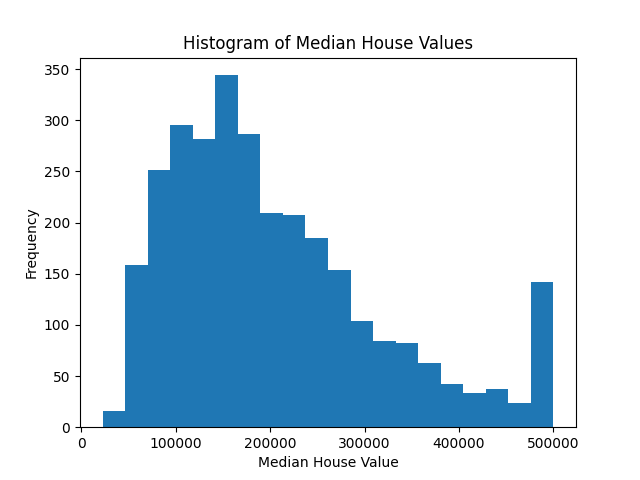

Output Files: 

File Name: median_house_values.txt



In [10]:
res = parse_output_files(response["output_files"])

### Step 3: Use the Vertex AI Search Extension to Research on Housing Opportunities

In this section, we do the following tasks:

- Create Vertex AI Search App with 4 PDFs for Search Extension.
- Use Search Extension to extract key information on housing investment opportunities Search App.
- Use Gemini model to summarize the key information.

For using the Vertex AI Search Extension, please grant the [Vertex AI Extension Service agent](https://cloud.google.com/vertex-ai/docs/general/access-control#service-agents) the [permission needed](https://cloud.google.com/vertex-ai/docs/general/access-control#home-project). In this case, you need permissions to run discovery engine.

To do so in the UI:
1. Go to https://console.cloud.google.com/iam-admin/iam
2. Make sure you're in the right project.
3. Enable the checkfield `Include Google-provided role grants`. This will show you the active service accounts in your project.
4. Locate the service agent with the name **Vertex AI Extension Service Agent**.
5. Click on the pen icon to edit the roles for this service agent.
6. Click on `add another role` and add **Discovery Engine Editor**.
7. Save the changes.


**Alternatively, run the next cell to assign the role to the Service Agent programmatically:**

In [20]:
%%bash -s "$PROJECT_ID"

# Get project number using gcloud
PROJECT_NUMBER=$(gcloud projects describe $1 --format="value(projectNumber)")

# Service agent email
SERVICE_AGENT_EMAIL="service-$PROJECT_NUMBER@gcp-sa-vertex-ex.iam.gserviceaccount.com"

# Role to add
ROLE="roles/discoveryengine.editor"

# Add the role using gcloud CLI (with the correct service agent email)
gcloud projects add-iam-policy-binding $1 \
    --member="serviceAccount:$SERVICE_AGENT_EMAIL" \
    --role=$ROLE

Updated IAM policy for project [mws-playground].


bindings:
- members:
  - serviceAccount:service-812852329854@gcp-sa-aiplatform-cc.iam.gserviceaccount.com
  role: roles/aiplatform.customCodeServiceAgent
- members:
  - serviceAccount:service-812852329854@gcp-sa-vertex-ex-cc.iam.gserviceaccount.com
  role: roles/aiplatform.extensionCustomCodeServiceAgent
- members:
  - serviceAccount:service-812852329854@gcp-sa-vertex-ex.iam.gserviceaccount.com
  role: roles/aiplatform.extensionServiceAgent
- members:
  - serviceAccount:service-812852329854@gcp-sa-aiplatform-re.iam.gserviceaccount.com
  role: roles/aiplatform.reasoningEngineServiceAgent
- members:
  - serviceAccount:service-812852329854@gcp-sa-aiplatform.iam.gserviceaccount.com
  role: roles/aiplatform.serviceAgent
- members:
  - serviceAccount:service-812852329854@compute-system.iam.gserviceaccount.com
  role: roles/compute.serviceAgent
- members:
  - serviceAccount:service-812852329854@gcp-sa-vertex-ex.iam.gserviceaccount.com
  role: roles/discoveryengine.editor
- members:
  - servic

If the previous cell doesn't run, try running `gcloud auth login` in a shell, which creates credentials for running `gcloud` commands. If it still doesn't run, you may need to set your project in gcloud, uncomment and run the next cell.

In [ ]:
#!gcloud config set project {PROJECT_ID}

#### Create a Vertex AI Search App for the Vertex AI Search Extension in 4 Steps

To create a search app for Vertex AI Search Extension to use, you can either do that manually by following [these docs](https://cloud.google.com/generative-ai-app-builder/docs/create-datastore-ingest) or run the 4 steps below.

##### 1. Download PDFs and Ingest Into GCS Bucket

The following cell lets you download the PDFs from the URLs and write them into .pdf files in current working directory. Then, these files will be uploaded to your GCS bucket. Those are the 4 PDFs we use in the search app: [PDF1](https://sgp.fas.org/crs/misc/R47617.pdf), [PDF2](https://sgp.fas.org/crs/misc/IF11327.pdf), [PDF3](https://www.whitehouse.gov/wp-content/uploads/2024/03/ERP-2024-CHAPTER-4.pdf), [PDF4](https://ahcd.assembly.ca.gov/sites/ahcd.assembly.ca.gov/files/HCD%20_SHA_Presentation.pdf)

In [21]:
# Create a GCS bucket if you don't have one.
GCS_BUCKET = f"{PROJECT_ID}-house-invest"
! set -x && gsutil mb -p $PROJECT_ID -l us-central1 gs://$GCS_BUCKET

+ gsutil mb -p mws-playground -l us-central1 gs://mws-playground-house-invest
Creating gs://mws-playground-house-invest/...


In [22]:
from google.cloud import storage

def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)

    generation_match_precondition = None
    blob.upload_from_filename(source_file_name, if_generation_match=generation_match_precondition)
    print(
        f"File {source_file_name} uploaded to {destination_blob_name}."
    )

In [23]:
import urllib.request
gcs_bucket = GCS_BUCKET # If you don't use the bucket created in the notebook, use the name of your bucket.
folder_path = "house_invest_pdfs/" #Default sub folder name in your gcs bucket. You can use this one.

# List of pdfs that you want to ingest to the bucket.
url_list = ["https://sgp.fas.org/crs/misc/R47617.pdf",
            "https://sgp.fas.org/crs/misc/IF11327.pdf",
            "https://www.whitehouse.gov/wp-content/uploads/2024/03/ERP-2024-CHAPTER-4.pdf",
            "https://ahcd.assembly.ca.gov/sites/ahcd.assembly.ca.gov/files/HCD%20_SHA_Presentation.pdf"]
i=1
for url in url_list:
  urllib.request.urlretrieve(url, f"invest{i}.pdf")
  upload_blob(gcs_bucket,f"invest{i}.pdf",f"{folder_path}invest{i}.pdf")
  i+=1

File invest1.pdf uploaded to house_invest_pdfs/invest1.pdf.
File invest2.pdf uploaded to house_invest_pdfs/invest2.pdf.
File invest3.pdf uploaded to house_invest_pdfs/invest3.pdf.
File invest4.pdf uploaded to house_invest_pdfs/invest4.pdf.


##### 2. Create a Vertex AI Search Data Store

The Vertex AI Search extension needs a **Data Store** and **Vertex AI Search App** to run. [You can learn more about Data Stores and Vertex AI Search Apps here](https://cloud.google.com/generative-ai-app-builder/docs/create-datastore-ingest).

Therefore, we need to do the following steps:
1. Create a Vertex AI Search data store.
1. Ingest our website PDF files into the data store.
1. Connect a Vertex AI Search App to the data store.

The following cells will help you in the setup.

In [26]:
# Specify an id for your datastore. It should only use lowercase letters.
DATA_STORE_ID = "ba-workflow-extensions" # @param {type:"string"}

Use the following bash command to **create** your Vertex AI Search data store:

In [ ]:
%%bash -s "$PROJECT_ID" "$DATA_STORE_ID"

curl -X POST \
-H "Authorization: Bearer $(gcloud auth print-access-token)" \
-H "Content-Type: application/json" \
-H "X-Goog-User-Project: $1" \
"https://discoveryengine.googleapis.com/v1alpha/projects/$1/locations/global/collections/default_collection/dataStores?dataStoreId=$2" \
-d '{
  "displayName": "BA-Workflow-Extensions-Store",
  "industryVertical": "GENERIC",
  "solutionTypes": ["SOLUTION_TYPE_SEARCH"],
  "contentConfig": "CONTENT_REQUIRED",
}'

🎉 Your data store is all set! You can inspect it under: https://console.cloud.google.com/gen-app-builder/data-stores

##### 3. Ingest PDF Files into the Vertex AI Search Data Store

Now you just need to **ingest** your .pdf files into it by running the two cells below.

**This process can take somewhere between 5-10 mins.** You can check the status of the ingestion by following the link above and clicking on your newly created Data Store.

In [28]:
from google.api_core.client_options import ClientOptions
from google.cloud import discoveryengine
from typing import Optional


def import_documents_sample(
    project_id: str,
    location: str,
    data_store_id: str,
    gcs_uri: Optional[str] = None,
) -> str:
    """Imports documents into a Vertex AI data store from GCS.

    This function imports documents into a specified data store within Vertex AI
    Agent Builder from a GCS bucket. It uses the incremental reconciliation
    mode, which adds new documents and updates existing ones.

    Args:
        project_id: The ID of the Google Cloud project.
        location: The region where the data store is located (e.g., "us-central1").
        data_store_id: The ID of the data store.
        gcs_uri: The GCS URI of the documents to import (e.g., "gs://my-bucket/docs/*.txt").

    Returns:
        str: The name of the long-running operation that imports the documents.

    Raises:
        google.api_core.exceptions.GoogleAPICallError: If the API call fails.

    """

    client_options = (
        ClientOptions(api_endpoint=f"{location}-discoveryengine.googleapis.com")
        if location != "global"
        else None
    )

    # Create a client.
    client = discoveryengine.DocumentServiceClient(client_options=client_options)

    # The full resource name of the search engine branch.
    # e.g. projects/{project}/locations/{location}/dataStores/{data_store_id}/branches/{branch}
    parent = client.branch_path(
        project=project_id,
        location=location,
        data_store=data_store_id,
        branch="default_branch",
    )

    request = discoveryengine.ImportDocumentsRequest(
        parent=parent,
        gcs_source=discoveryengine.GcsSource(
            input_uris=[gcs_uri], data_schema="content"
        ),
        # Options: `FULL`, `INCREMENTAL`
        reconciliation_mode=discoveryengine.ImportDocumentsRequest.ReconciliationMode.INCREMENTAL,
    )


    # Make the request
    operation = client.import_documents(request=request)

    print(f"Waiting for operation to complete: {operation.operation.name}")
    response = operation.result()

    # Once the operation is complete, get information from operation metadata.
    metadata = discoveryengine.ImportDocumentsMetadata(operation.metadata)

    # Handle the response.
    print(response)
    print(metadata)

    return operation.operation.name

In [ ]:
GCS_URI = f"gs://{gcs_bucket}/{folder_path}*.pdf"
import_documents_sample(PROJECT_ID, "global", DATA_STORE_ID, GCS_URI)

##### 4. Create a Vertex Search App and Connect it to the Data Store

The following cell lets you create a Vertex AI Search App to ✨**connect**✨ to your newly created data store. For the Vertex AI Search Extension to work, we need to enable [Advanced Features](https://cloud.google.com/generative-ai-app-builder/docs/about-advanced-features), including Enterprise features by setting `"searchTier": "SEARCH_TIER_ENTERPRISE" `and Advanced LLM Features by setting `"searchAddOns": ["SEARCH_ADD_ON_LLM"]` in the code cell below.

**These settings will be set automatically by running the next cell.**

In [30]:
%%bash -s "$PROJECT_ID" "$DATA_STORE_ID"

curl -X POST \
-H "Authorization: Bearer $(gcloud auth print-access-token)" \
-H "Content-Type: application/json" \
-H "X-Goog-User-Project: $1" \
"https://discoveryengine.googleapis.com/v1/projects/$1/locations/global/collections/default_collection/engines?engineId=$2" \
-d '{
  "displayName": "BA-Workflow-Extension-Engine",
  "dataStoreIds": ["'$2'"],
  "solutionType": "SOLUTION_TYPE_SEARCH",
  "searchEngineConfig": {
     "searchTier": "SEARCH_TIER_ENTERPRISE",
     "searchAddOns": ["SEARCH_ADD_ON_LLM"]
   }
}'

curl: /opt/conda/lib/libcurl.so.4: no version information available (required by curl)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   916    0   656  100   260    816    323 --:--:-- --:--:-- --:--:--  1139


{
  "name": "projects/812852329854/locations/global/collections/default_collection/operations/create-engine-7710498838676849606",
  "done": true,
  "response": {
    "@type": "type.googleapis.com/google.cloud.discoveryengine.v1.Engine",
    "name": "projects/812852329854/locations/global/collections/default_collection/engines/ba-workflow-extensions2",
    "displayName": "BA-Workflow-Extension-Engine",
    "dataStoreIds": [
      "ba-workflow-extensions2"
    ],
    "solutionType": "SOLUTION_TYPE_SEARCH",
    "searchEngineConfig": {
      "searchTier": "SEARCH_TIER_ENTERPRISE",
      "searchAddOns": [
        "SEARCH_ADD_ON_LLM"
      ]
    }
  }
}


#### Set Up the Vertex AI Search Extension and Extract Key Information

After you create the search app use the Vertex AI Search Extension to connect to it, in order to extract the key housing research information. Below cells show you how to get the information using the Vertex AI Search Extension.

In [31]:
#If you use the notebook to create the search app, this should be the app name.
#If you use your own app name, you can find it in the UI as described below
SEARCH_APP_ID = "ba-workflow-extensions"
SEARCH_APP_REGION = "global"

Once you create the search app, use the search app id in the vertex ai extension notebok. You can find it in [the search app UI](https://console.cloud.google.com/gen-app-builder/engines).

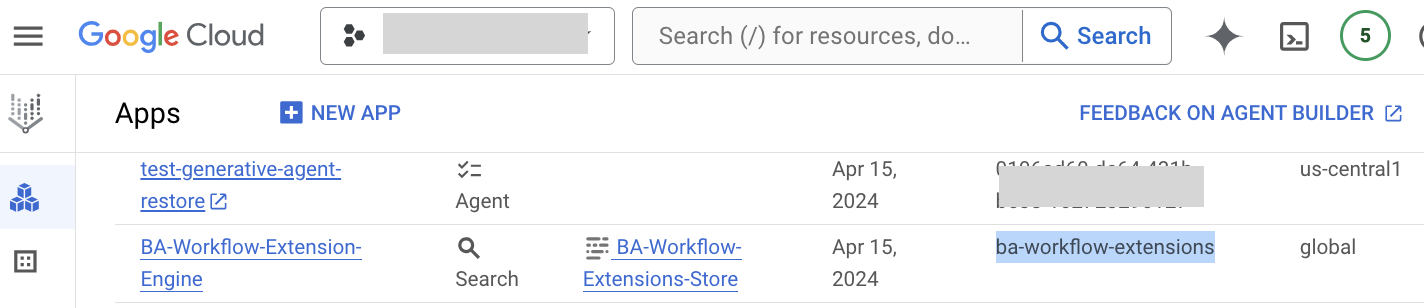

In [38]:
# Configure the Vertex AI Search extension.
SEARCH_CONFIG  = "projects/{project_id}/locations/{search_app_region}/collections/default_collection/engines/{search_app_id}/servingConfigs/default_search".format(
    project_id=PROJECT_ID,
    search_app_region=SEARCH_APP_REGION,
    search_app_id=SEARCH_APP_ID)

In [39]:
# Create the extension and register it in your project.
extension_vertex_ai_search = extensions.Extension.from_hub(
    "vertex_ai_search",
    runtime_config={
        "vertex_ai_search_runtime_config": {
            "serving_config_name": SEARCH_CONFIG,
        }
    })

extension_vertex_ai_search

Creating Extension
Create Extension backing LRO: projects/812852329854/locations/us-central1/extensions/2356825164370411520/operations/5252615020117753856
Extension created. Resource name: projects/812852329854/locations/us-central1/extensions/2356825164370411520
To use this Extension in another session:
extension = vertexai.preview.extensions.Extension('projects/812852329854/locations/us-central1/extensions/2356825164370411520')


resource name: projects/812852329854/locations/us-central1/extensions/2356825164370411520

Now we'll query our search app via the Vertex AI Search extension. 

> ❗**NOTE - if you are facing the following error:**

>`FailedPrecondition: 400 Cannot use enterprise edition features (website search, multi-modal search, extractive answers/segments, etc.) in a standard edition search engine...`

>when running the cell below, simply wait a few minutes and try to run the cell again. That means the settings from the Vertex AI Search App creation have not yet propagated to the system (setting propagation may take up to 15 minutes to take effect after creating the search app).❗

In [35]:
QUERY = "Extract key information about investment opportunities in the housing market." # @param {type:"string"}

In [36]:
vertex_ai_search_response = extension_vertex_ai_search.execute(
    operation_id = "search",
    operation_params = {"query": QUERY},
)

There are a lot of texts returned back from the extension response. In this example, we only use extractive_answers from the response because they capture main information in a concise way. You can read more [here](https://cloud.google.com/generative-ai-app-builder/docs/snippets#extractive-answers).

In [37]:
list_extractive_answers=[]
for i in vertex_ai_search_response:
    list_extractive_answers.append(i["extractive_answers"][0])
    print(i["extractive_answers"][0])

Home sales began to recover in 2011 and 2012 but have still not recovered to pre-recession levels. In 2021, sales of existing houses increased by 8.5% while sales of new houses decreased by 6.2%.
Vacancy rates dipped further during the COVID-19 pandemic and hit several-decade lows in 2022. • The number of single-family homes available for sale each year has trended downward since 2000 but particularly after the housing crisis of 2007-2009.
Historically, interest rates have fluctuated between 4 and 8 percent. Equity, mostly from private investors, fills the gap between debt and project costs. Housing development equity is a relatively risky investment class due to the time required for projects to generate rev enue.
1. Increase supply of housing affordable to all income levels by reducing time and cost of development.


#### Summarize Extracted Answers to Bullet Points

We use Gemini to summarize the housing investment information the Vertex AI Search extension returns.

In [40]:
from vertexai.generative_models import GenerativeModel
SUMMARY_QUERY = "Summarize investment opportunities in housing market in 4 bullet points."
model = GenerativeModel(model_name="gemini-1.0-pro")
summary_response = model.generate_content(f"{SUMMARY_QUERY} from the content below: {list_extractive_answers}")

Reformat the summary from Gemini to bullet points to make it easier to display in the deck.

In [41]:
def to_bullet_points(text):
  text = text.replace('**','')
  text = text.replace('* ','• ')
  text = text.replace('\n','\n\n')
  return text

In [42]:
deck_text = to_bullet_points(summary_response.text)
deck_text

"## Investment Opportunities in the Housing Market:\n\n\n\n• Increased demand: While home sales haven't fully recovered to pre-recession levels, they are on an upward trend. This suggests a growing demand for housing, creating potential opportunities for investors. \n\n• Low vacancy rates: Vacancy rates are at historic lows, indicating strong rental market performance and potential for stable rental income.\n\n• Limited supply: The number of available homes for sale has been steadily declining, creating a potential supply shortage that could drive up prices and benefit investors. \n\n• Focus on affordable housing:  Initiatives aimed at increasing the supply of affordable housing could present investment opportunities in this growing segment of the market. \n\n"

### Step 4 (Optional): Add Data Analysis and Research to a Slide Deck

You will do the following tasks in this step:

- Set up workspace API credentials
- Update the histogram chart to be inserted to the slide deck
- Add the histogram chart to the slide template
- Add housing research summary from Vertex AI search extension to the slide

If you are skipping this optional section, you should still go to the "Cleaning Up" section at the end if you want to remove files and GCP resources created by this notebook.

##### Workspace API OAuth Credential Setup

To run Google Slides, Sheets, and Gmail APIs in the notebook, you will need to configure the Google Workspace API credentials first.

🚨 **As mentioned in the beginning of this notebook, using the Workspace APIs requires setting up an OAuth consent screen and going through a web-based authentication flow that many remote notebook environments, including Colab and Jupyterlab don't support out-of-the-box. If you want to run through the optional section, make sure you are running this notebook in an environment that can open a webpage that you can interact with, like a local development environment.**🚨

For this, you need to configure the Google Workspace API and credentials first. You can check out the [Python Quick Start Guide](https://developers.google.com/gmail/api/quickstart/python) for more details. If you've followed this notebook so far just follow these steps to complete the configuration:

👣 **Steps for setting up the scopes:**
1. [Go to the OAuth consent screen in your project](https://console.cloud.google.com/apis/credentials/consent)
1. For User type select external, then click Create.
1. Complete the app registration form by adding an app name, and adding your email to the user support email & developer contact information, then click Save and Continue.
1. Click on `Add or Remove Scopes`
1. In the filter search bar of the selected scopes window, search for and enable the needed scopes https://www.googleapis.com/auth/spreadsheets, https://www.googleapis.com/auth/gmail.send, https://www.googleapis.com/auth/gmail.compose, https://www.googleapis.com/auth/gmail.modify, https://www.googleapis.com/auth/presentations
1. Click on Save and Continue.
1. In the Test Users window, add your own Google email address as a User by clicking `Add Users`, then click on Save and Continue.
1. Review your app registration summary. To make changes, click Edit. If the app registration looks OK, click Back to Dashboard.


👣  **Steps for retrieving authorized credentials:**
1. Go to [Credentials](https://console.cloud.google.com/apis/credentials) in the GCP console.
1. Click Create Credentials > OAuth client ID.
1. Click Application type > Desktop app.
1. In the Name field, type a name for the credential. This name is only shown in the Google Cloud console.
1. Click Create. The OAuth client created screen appears, showing your new Client ID and Client secret.
1. Click OK. The newly created credential appears under OAuth 2.0 Client IDs.
1. Save the downloaded JSON file as credentials.json and move it to the working directory of your local IDE

Now, you can run the code in the cell below. The code below uses the credentials.json to create a token.json file that our notebook can use.

As mentioned above, this code to trigger web-based oauth won't run in most remote execution notebook environments. But if you are in a remote notebook environment, you can run this code in your local development environment and then copy the token.json file into the working directory of your remote notebook environment (in Colab, into the file directory in the left panel which goes to the working directory for the notebook).






In [ ]:
import os
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from google.oauth2 import credentials

SCOPES=["https://www.googleapis.com/auth/spreadsheets",
        "https://www.googleapis.com/auth/gmail.send",
        "https://www.googleapis.com/auth/gmail.compose",
        "https://www.googleapis.com/auth/gmail.modify",
        "https://www.googleapis.com/auth/presentations"]

creds = None
# Token file typically stores credentials for reuse.
token_file = 'token.json'

# Check if authorized credentials exist.
if os.path.exists(token_file):
    creds = credentials.Credentials.from_authorized_user_file(token_file, SCOPES)
# If not, or credentials are invalid, trigger the authorization flow.
if not creds or not creds.valid:
    if creds and creds.expired and creds.refresh_token:
        creds.refresh(Request())
    else:
        flow = InstalledAppFlow.from_client_secrets_file(
        "credentials.json", SCOPES
        )
        creds = flow.run_local_server(port=0)
    # Save the credentials for the next run
    with open("token.json", "w") as token:
        token.write(creds.to_json())

In [ ]:
# Code below uses the token.json you generated in the previous step.
# Make sure token.json is in your current working directory.
from google.oauth2.credentials import Credentials

scopes=["https://www.googleapis.com/auth/spreadsheets",
        "https://www.googleapis.com/auth/gmail.send",
        "https://www.googleapis.com/auth/gmail.compose",
        "https://www.googleapis.com/auth/gmail.modify",
        "https://www.googleapis.com/auth/presentations"]
creds = Credentials.from_authorized_user_file("token.json", scopes)

#### Update the Histogram Chart to be Inserted to the Slide Deck

In order to insert a histagram chart into a deck later, we will need to create a histagram chart in a sheet first. Please [make a copy](https://support.google.com/docs/answer/49114#zippy=%2Cmake-a-copy-of-a-file) of this [sheet template](https://docs.google.com/spreadsheets/d/1VURqw88fJf6JreqKmFQwjveHhkQo3r-dyQwX5kh4hjE/edit#gid=990375291) for this notebook.

After you copy the sheet, you should see the raw template. The histogram chart hasn't been updated yet. Now you're gonig to update the values used to make this chart in 2 steps.

- Get the median house value csv data from the code extension step and convert it to histogram data. In this example, we convert it to 10 bins.
- Run the Sheets API to update the chart with the histogram values.

This function converts housing value data to 10-bin histogram data. You'll then use this function to create your data.

In [43]:
import numpy as np
def convert_csv_to_hist(res):
  """Converts CSV-formatted data into a histogram-compatible data structure.

  This function takes a CSV string containing median value and count information
  and transforms it into a list suitable for generating a histogram plot.

  Args:
    res: A string containing CSV data. The first line is assumed to contain
         column headers, with subsequent lines containing median value and count
         pairs separated by a comma.

  Returns:
    A list where the first element contains the original CSV header information.
    Subsequent elements are lists with two values: [bin_center, bin_count],
    representing the center of each histogram bin and the corresponding count of
    data points within that bin.
  """
  hist_data=[]
  res_arr = res.split('\n')
  for arr in res_arr[1:]:
    median_val_count = arr.split(',')
    if not '' in median_val_count:
      median_val_count_float = [float(i) for i in median_val_count]
      hist_data.append(median_val_count_float)
  hist_data_sorted = sorted(hist_data,key=lambda x: x[0])
  hist_data_sorted_np=np.array(hist_data_sorted)

  # Convert np.array to histogram chart data.
  hist_data_final=[]
  bin_len = int(len(hist_data_sorted)/9)
  for i in range(0,len(hist_data_sorted),bin_len):
    temp_arr = hist_data_sorted_np[i:i+bin_len-1,:]
    bin_center = np.mean(temp_arr[:, 0])
    bin_count = np.sum(temp_arr[:, 1])
    hist_data_final.append([int(bin_center),int(bin_count)])
  hist_data_final.insert(0,res_arr[0].split(','))
  return hist_data_final

In [44]:
hist_data_final = convert_csv_to_hist(res)
hist_data_final

[['22500.0', '1'],
 [65653, 288],
 [99118, 402],
 [131761, 382],
 [161613, 400],
 [190894, 310],
 [224767, 317],
 [263217, 283],
 [316471, 255],
 [406636, 224],
 [500001, 125]]

Debugging Tip: if median_house_value_counts.csv is not returned from parse_output_files function (a few cells above), this `convert_csv_to_hist` function will fail. To temporarily bypass the failure, you can set `hist_data_final` to the data below. You can continue running the rest of the notebook this way. Later, you can come back and try the prompt above again or modify the prompt to get the median_house_value_counts.csv.



In [45]:
# Uncomment it and run it if needed
# hist_data_final=
# [['median_house_value', 'count'],
#  [65344, 288],
#  [98957, 403],
#  [131601, 380],
#  [161468, 400],
#  [190727, 310],
#  [224597, 317],
#  [262999, 283],
#  [316138, 255],
#  [405905, 224],
#  [500000, 129]]

After we get the histogram data, we are going to update the chart in the sheet now. This function below updates a specified range of cells within a Google Sheet with new values provided as input. 

You can learn more about [Google Sheets API here](https://developers.google.com/sheets/api/guides/concepts).

In [ ]:
from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
def update_values(spreadsheet_id, range_name, value_input_option, values,creds):
  """Updates a range of cells in a Google Sheet with new values.

  Args:
    spreadsheet_id: The ID of the Google Sheet to update.
    range_name: The range of cells to update, in A1 notation (e.g., "A1:B11").
    value_input_option: Determines how the input values should be interpreted.
      Valid options include "USER_ENTERED".
    values: A list of lists representing the values to be written. The structure
      should match the desired range.
    creds: Credentials object authorizing access to the Google Sheets API.

  Returns:
    A dictionary containing information about the updated cells, or an HttpError object
    in case of an error.

  Raises:
    HttpError: If an error occurs during the Sheets API call.
  """
  try:
    service = build("sheets", "v4", credentials=creds)
    body = {"values": values}
    result = (
        service.spreadsheets()
        .values()
        .update(
            spreadsheetId=spreadsheet_id,
            range=range_name,
            valueInputOption=value_input_option,
            body=body,
        )
        .execute()
    )
    print(f"{result.get('updatedCells')} cells updated.")
    return result
  except HttpError as error:
    print(f"An error occurred: {error}")
    return error

To use this function on your sheet, you'll need the sheet ID of your copy of the sheet. You can find your sheet ID by looking at the URL of your copy of the sheet:

- In this URL example below, sheet id is **1VURqw88fJf6JreqKmFQwjveHhkQo3r-dyQwX5kh4hjE**
- URL example: https://docs.google.com/spreadsheets/d/1VURqw88fJf6JreqKmFQwjveHhkQo3r-dyQwX5kh4hjE/edit#gid=990375291

In [ ]:
# Add data into the sheet to update the chart.
SHEET_ID = "your sheet id"  # Replace this with your sheet id
update_values(
      SHEET_ID,
      "A1:B11",
      "USER_ENTERED",
      hist_data_final,creds
  )

In [ ]:
def get_chart_id(
        spreadsheet_id,creds):
    """Retrieves a list of chart IDs from a Google Sheet.

    Args:
        spreadsheet_id: The ID of the Google Spreadsheet.
        creds: Credentials object for authorizing API requests.

    Returns:
        A list of chart IDs found within the specified spreadsheet.
    """
    spreadsheet_id = spreadsheet_id
    ranges = []
    include_grid_data = False

    service = build("sheets", "v4", credentials=creds)
    request = service.spreadsheets().get(
        spreadsheetId=spreadsheet_id,
        ranges=ranges,
        includeGridData=include_grid_data)
    response = request.execute()

    chart_id_list = []
    for chart in response['sheets'][0]['charts']:
        chart_id_list.append(chart['chartId'])
    return chart_id_list

#### Add the Histogram Chart to the Slide Template

Now that you've put updated numbers into your spreadsheet, you want to get the new chart into your slide deck.

The next cell is a function to take a histogram chart from a Google Sheet and insert it into a specified slide within a Google Slides presentation. The function maintains a live link between the sheet and the presentation, ensuring that any changes made in the sheet data automatically reflect in the presentation chart.;

In [ ]:
import uuid
def add_chart_to_slides(presentation_id, spreadsheet_id, page_id, creds):
    """
    Adds a chart from a Google Sheet to a Google Slides presentation.

    Args:
        presentation_id (str): The ID of the Google Slides presentation.
        spreadsheet_id (str): The ID of the Google Sheet containing the chart.
        page_id (str): The ID of the slide page to insert the chart into.
        creds: Credentials object for authenticating with the Google Slides API.

    Returns:
        None

    Notes:
        * The first chart in the specified Google Sheet will be added to the presentation.
        * The chart will be linked to the spreadsheet, so changes in the sheet will update the chart in the presentation.
        * The `emu4m` variable defines the default size and position of the chart.
          Modify these values to customize the chart's appearance.
    """
    emu4m = {
        'magnitude': 4000000,
        'unit': 'EMU'
    }

    sheet_chart_id_list = get_chart_id(
        spreadsheet_id,creds)

    presentation_chart_id = str(uuid.uuid4())
    requests = [
            {
        'createSheetsChart': {
            'objectId': presentation_chart_id,
            'spreadsheetId': spreadsheet_id,
            'chartId': sheet_chart_id_list[0],
            'linkingMode': 'LINKED',
            'elementProperties': {
                'pageObjectId': page_id,
                'size': {
                    'height': emu4m,
                    'width': emu4m
                },
                'transform': {
                    'scaleX': 1.5,
                    'scaleY': 1.5,
                    'translateX': 1000000,
                    'translateY': 100000,
                    'unit': 'EMU'
                }
            }
        }
        }
        ]

    body = {
        'requests': requests
    }
    service = build("slides", "v1", credentials=creds)
    service.presentations().batchUpdate(
        presentationId=presentation_id,
        body=body).execute()

Please copy this [slide template](https://docs.google.com/presentation/d/15z20CP574Vb3AMU72g_C2Z25taY78aVZ0n3xhE4I8sY/edit#slide=id.g2cb57cea9e7_0_0) for this notebook.

To run the function above and some of the steps below, you'll need a slide deck ID and slide page IDs. You can find these IDs by looking at the URL when you're viewing a specific slide in your copy of the deck:
- In this URL example below, **15z20CP574Vb3AMU72g_C2Z25taY78aVZ0n3xhE4I8sY** is the slide deck id and **g2cb57cea9e7_0_0** is the slide page id. 
- URL example: https://docs.google.com/presentation/d/15z20CP574Vb3AMU72g_C2Z25taY78aVZ0n3xhE4I8sY/edit#slide=id.g2cb57cea9e7_0_0

Make sure to get the slide page ID for both slides, as you view a different slide in the deck in your web browser the slide page ID in the URL will change. The slide deck ID will not change.

You can read more about these IDs [here](https://developers.google.com/slides/api/samples/reading).

You can learn more about [Google Slides API here](https://developers.google.com/slides/api/reference/rest).

In [ ]:
SLIDE_DECK_ID = "your slide deck id"  # Replace this with your slide deck id.
SLIDE_PAGE1_ID = "page 1 id of your slide deck"  # Replace this with slide page 1 id of the slide deck.
SLIDE_PAGE2_ID = "page 2 id of your slide deck"  # Replace this with slide page 2 id of the slide deck.
add_chart_to_slides(SLIDE_DECK_ID, SHEET_ID, SLIDE_PAGE2_ID, creds)

#### Add Housing Research Summary from Vertex AI Search Extension to the Slide Deck

Next, you want to insert the research summary into the deck template.

Slide 1 of the deck has the text "{{replace_text}}", the function below looks for "{{replace_text}}" in a slide and replaces it with text specified when calling the function.

In [ ]:
def replace_text_in_slides(slide_deck_id,
                           slide_page_id,
                           deck_text,
                           creds):
  """
  Replaces '{{replace_text}}` on a Google Slides slide with replacement text.

  Args:
    slide_deck_id: The ID of the Google Slides presentation to modify.
    slide_page_id: The ID of the slide to modify.
    deck_text: The replacement text to insert in place of `{{replace_text}}`.
    creds: Valid Google credentials for accessing the Slides API.

  Raises:
    HttpError: If an error occurs while communicating with the Slides API.
  """
  try:
    service = build("slides", "v1", credentials=creds)
    presentation_id = slide_deck_id # you need to use the presentation id of your slide

    requests = [
            {
          "replaceAllText": { # Replaces all instances of text matching a criteria with replace text. # Replaces all instances of specified text.
          "containsText": { # A criteria that matches a specific string of text in a shape or table. # Finds text in a shape matching this substring.
            "matchCase": True, # Indicates whether the search should respect case: - `True`: the search is case sensitive. - `False`: the search is case insensitive.
            "text": "{{replace_text}}", # The text to search for in the shape or table.
          },
          "pageObjectIds": [ # If non-empty, limits the matches to page elements only on the given pages. Returns a 400 bad request error if given the page object ID of a notes master, or if a page with that object ID doesn't exist in the presentation.
            slide_page_id,
          ],
          "replaceText": deck_text, # The text that will replace the matched text.
        }
            }
        ]

    body = {
        'requests': requests
    }
    service.presentations().batchUpdate(
        presentationId=presentation_id,
        body=body).execute()
  except HttpError as err:
    print(err)

replace_text_in_slides(SLIDE_DECK_ID, SLIDE_PAGE1_ID, deck_text, creds)

### Step 5 (Optional): Email Slide Link to Stakeholders

Now that you've created your deck, you need to send it to your team. This function sends an email containing a link to the Google Slides presentation. It uses the Gmail API to authenticate with your Gmail account and then creates and sends an email message with the specified recipient, sender, subject, and presentation link.

You can learn more about [Gmail API here](https://developers.google.com/gmail/api/guides).



In [ ]:
# Set these values before sending the email.
EMAIL_TO = "email to adress" # Replace this with the email address you're sending to.
EMAIL_FROM = "email from address" # Replace this with your email address.
EMAIL_SUBJECT = "Latest Housing Research"
EMAIL_CONTENT = f"Hi team. As discussed, here's the presentation on California housing: https://docs.google.com/presentation/d/{SLIDE_DECK_ID}"

from email.message import EmailMessage

def send_email(email_to, email_from, email_subject, email_content, creds):
  """Sends an email with a link to a Google Slides presentation.

  Args:
    email_to: Email address of the recipient.
    email_from: Email address of the sender.
    email_subject: Subject line of the email.
    email_content: Content of the email.
    creds: Credentials object used for authentication with the Gmail API.

  Raises:
    HttpError: If an HTTP error occurs during communication with the Gmail API.
  """
  try:
    # Create Gmail API client.
    service_gmail = build("gmail", "v1", credentials=creds)

    message = EmailMessage()
    # Send the slide to the stakeholders.
    message.set_content(email_content)

    message["To"] = email_to
    message["From"] = email_from
    message["Subject"] = email_subject

    # Encoded message.
    encoded_message = base64.urlsafe_b64encode(message.as_bytes()).decode()

    create_message = {"raw": encoded_message}
    send_message = (
        service_gmail.users()
        .messages()
        .send(userId="me", body=create_message)
        .execute()
    )
    print(f'Message Id: {send_message["id"]}')
  except HttpError as error:
    print(f"An error occurred: {error}")
    send_message = None

send_email(EMAIL_TO, EMAIL_FROM, EMAIL_SUBJECT, EMAIL_CONTENT, creds)

Message Id: 18ec45f70bf82a85


After you run the send email function above, the email address you specific in `EMAIL_TO` should recieve an email similar to the screenshot below.

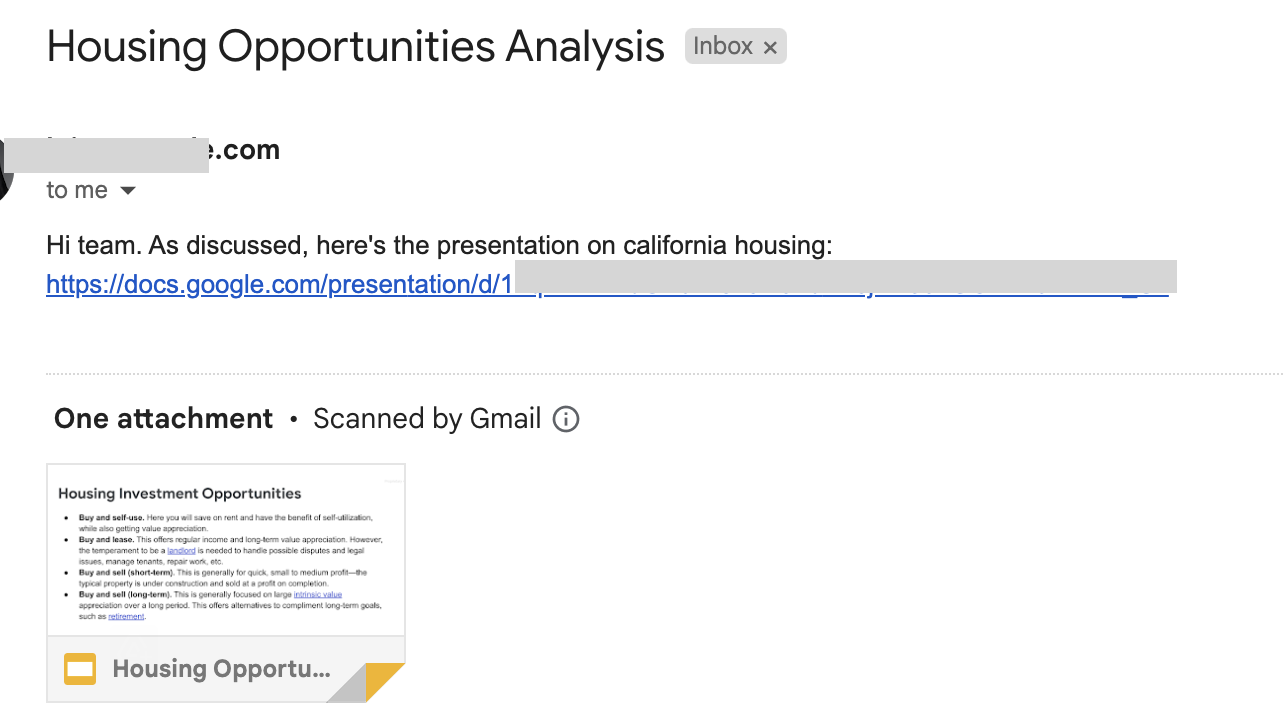

# 🧹 Cleaning up

Clean up resources created in this notebook.

Remove the extensions instances created in this notebook by running the cell below:  

In [ ]:
extension_code_interpreter.delete()
extension_vertex_ai_search.delete()

You can run the next cell to get a list of all other remaining Vertex AI Extension Instances in your environment:

In [ ]:
extensions.Extension.list()

Optionally, you can uncomment the following code block to delete all active extensions in your project, by using the IDs above to clean up:

In [ ]:
#clean_ids = []

#for element in extensions.Extension.list():
    #clean_ids.append(str(element).split("extensions/")[1])

#for id in clean_ids:
   #extension = extensions.Extension(id)
   #extension.delete()

Uncomment below to delete your GCS Bucket by first deleting all files in it, then deleting the bucket itself:

❗❗❗ Only run the below cells if you created a new bucket just for this notebook ❗❗❗

In [ ]:
# Delete contents of the bucket and the bucket
#! gsutil -m rm -r gs://$GCS_BUCKET

Delete your Google Cloud CLI ADC Configuration, if you no longer need it, by running this command in your shell:

`$ gcloud config configurations delete CONFIG_NAME`

❗❗❗ Don't forget to delete any other created assets if you don't need them, e.g. the Vertex AI data store and search app (you need to delete them from the Google Cloud Console).

*   Your Vertex AI Search app: https://console.cloud.google.com/gen-app-builder/apps
*   Your Vertex AI Search data store: https://console.cloud.google.com/gen-app-builder/data-stores

Uncomment to delete files downloaded by this notebook:

In [46]:
# os.remove('california-housing-test.csv')
# os.remove('invest1.pdf')
# os.remove('invest2.pdf')
# os.remove('invest3.pdf')
# os.remove('invest4.pdf')